<a href="https://colab.research.google.com/github/pbacova/NCC-Intermediate-Training-2022/blob/main/PythonForDataScience_slot1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

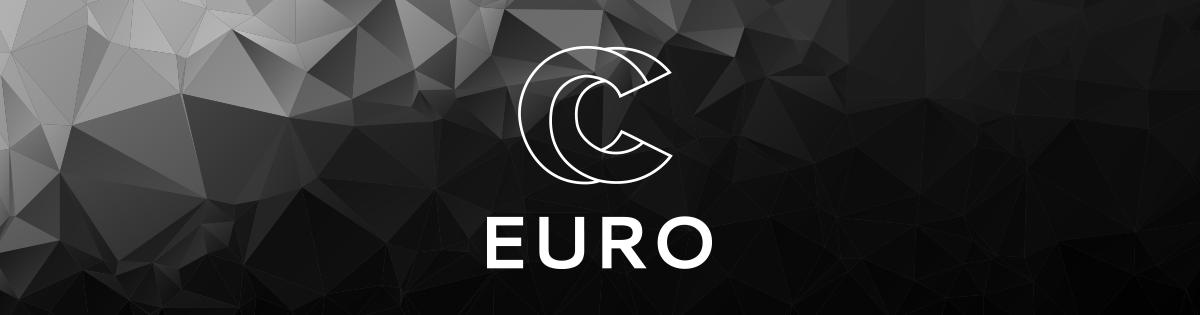

# Python In Data Science - Introduction



Data Science is a field where scientific methodology, programming skills and mathematical knowledge are combined in order to derive insights from data. Even though the term is used relatively loosely, the hierarchy of needs in Data Science can be summarized in the chart below:

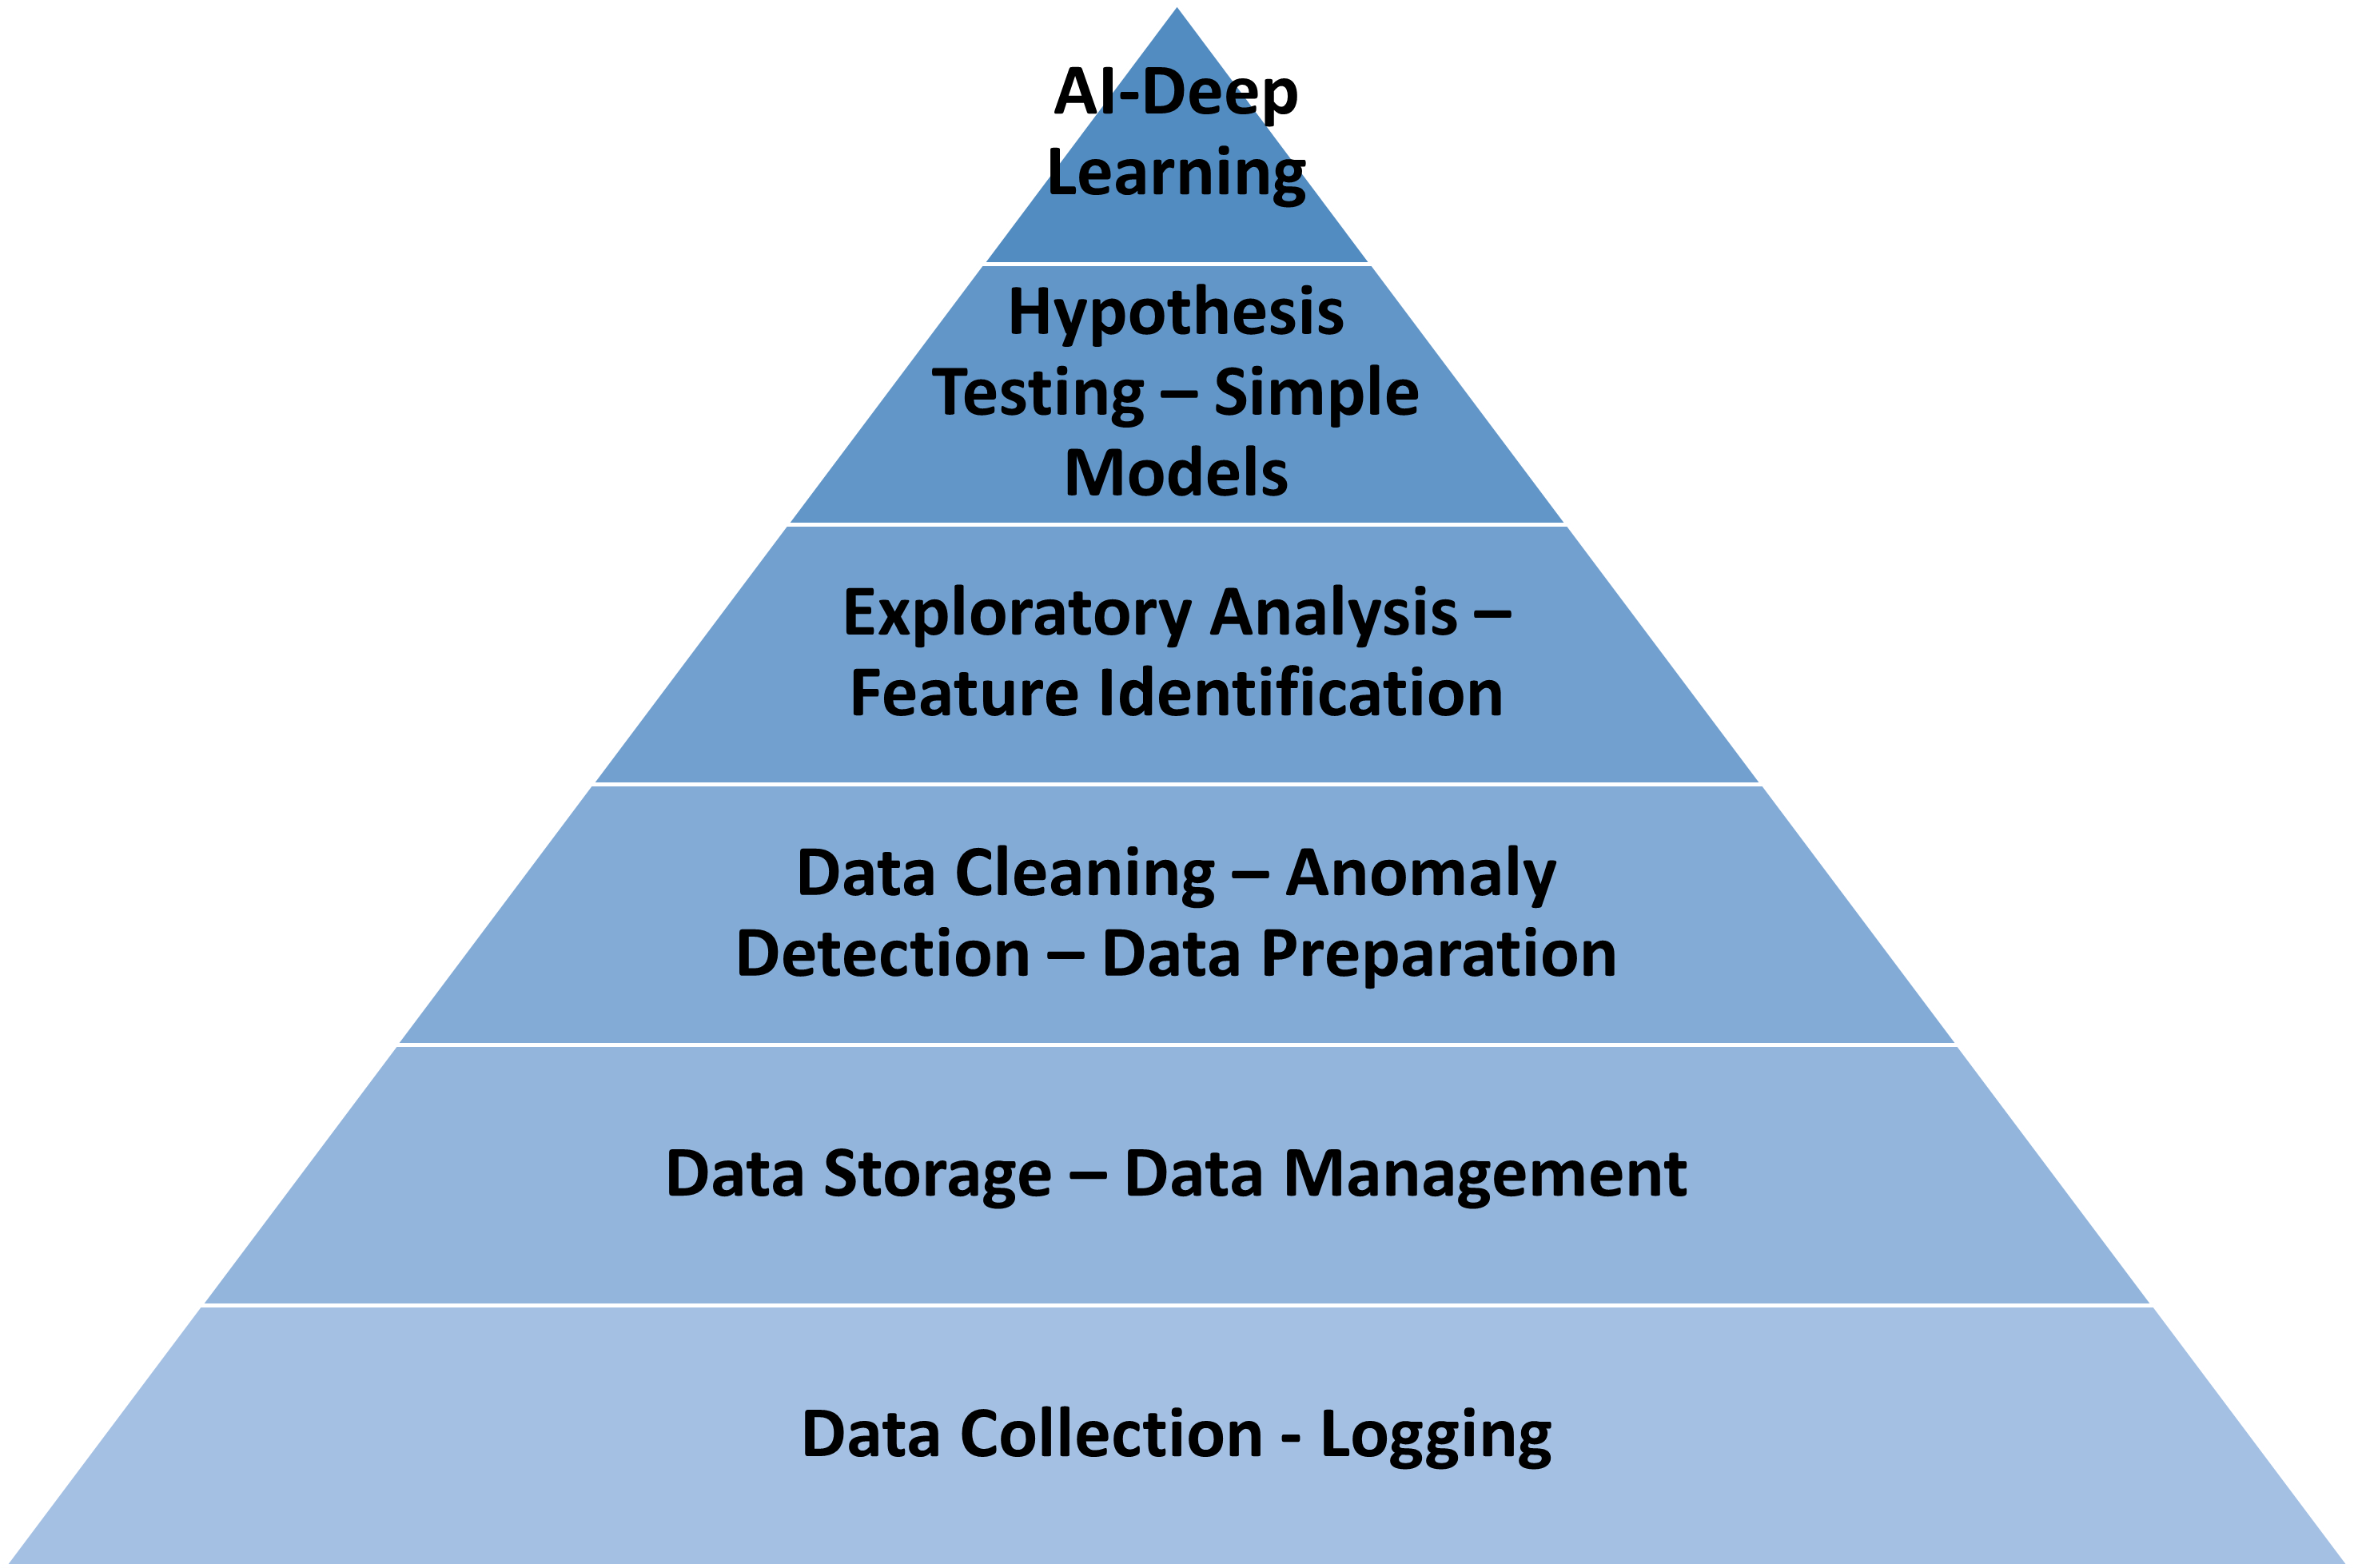

Depending on the needs of an organization, a data scientist might be responsible for any of the above tasks. However, most of the times the main responsibilities are described by the top levels of the pyramind.

In this training session, we will focus on these higher levels of the pyramid (Data Cleaning - Explroratory Analysis - Simple Model Implementation), as well as the tools used for each step.

As we can see in the above chart, cleaning, preparing and analysing the data is an essential step before implementing predictive models. Pandas is a python library that is extremely useful when performing these tasks. Therefore, in this notebooks we will cover the main functionalities of pandas, using examples on an actual dataset.
 

# Importing Libraries:





We start by importing the libraries that are required for the specific task.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In order to get data in to google colab, we can either temporarily upload the requried files (lost when runtime is terminated) or mount the notebook to a google drive where the data is stored. This is more common for data science projects, where data is often stored on the cloud.

However, in order to access data from Google Drive, users need the relevant authorisation. Therefore we'll be using the relevant github repository as the source for our data.

In [ ]:
# # mount drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# just a simple print statemet - not relevant
def line(n=100):
  print(n*'-')
  print()

# Reading Data:

For this tutorial we'll be using the Titanic dataset, which is publicly available on [Kaggle](https://www.kaggle.com/competitions/titanic/data?select=train.csv). It is not clear whether the information in this dataset is real or not, but regrardless it is a good starting point for diving into data science. It has both numerical and categroical columns, describing the passengers on the Titanic. Namely, these colums are:



* **survival**: Survival	0 = No, 1 = Yes
* **pclass**:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* **sex**:	Sex	
* **Age**:	Age in years	
* **sibsp**:	# of siblings / spouses aboard the Titanic	
* **parch**:	# of parents / children aboard the Titanic	
* **ticket**:	Ticket number	
* **fare**:	Passenger fare	
* **cabin**:	Cabin number	
* **embarked**:	Port of Embarkation


We start by reading the data from a specified file path. Usually, the data would be stored in the same directory as the notebook (or python script). Pandas can read several data formats including xls, JSON, SQL and HTML. However, one of the simplest formats, widely used in data science, is the comma separated file (CSV). CSVs contain plain text, where each line is an individual record. Below we read the dataset both from a CSV and Excel file:

In [ ]:
# # define path to dataset
# data_path = 'gdrive/My Drive/EUROCC Training/data/'

# # read data from csv
# df = pd.read_csv(os.path.join(data_path, "train.csv"))
# os.path.join(data_path, "train.csv")
# # read data from excel
# df_excel = pd.read_excel(os.path.join(data_path, "train.xlsx"))

In [ ]:
# Data urls (github)
csv_url = 'https://raw.githubusercontent.com/CaSToRC-CyI/NCC-Intermediate-Training-2022/main/Day3/Python%20In%20Data%20Science/Data/train.csv'
excel_url = 'https://github.com/CaSToRC-CyI/NCC-Intermediate-Training-2022/blob/main/Day3/Python%20In%20Data%20Science/Data/train.xlsx?raw=True'

# Load both datasets
df = pd.read_csv(csv_url)
df_excel = pd.read_excel(excel_url)

Care must be taken when loading data formats as the data types may vary between two different storage options. For example, the excel dataframe and the CSV dataframe are not equal in pandas. Let's check whether the two dataframes loaded from the different sources are equal in the cell below:

In [ ]:
# Check equality between csv and excel dataframes
df.equals(df_excel)

False

First, let's confirm that the two dataframes have the same shape and the same column names. We can access the columns using ```DataFrame.columns``` and the shape using ```DataFrame.shape```

In [ ]:
assert df.shape == df_excel.shape
print('CSV Column names: {} \n Excel Column names:{}'.format(
    df.columns.tolist(),
    df_excel.columns.tolist())
)

CSV Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 
 Excel Column names:['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


As we can see above, the ```DataFrame.equals() ``` method returns False, even when the shapes and columns are the same. This is because the method also checks column dtypes, besides values. Let's examine the columns individually:

In [ ]:
# check for equality between individual columns of dataframes
# columns can be accessed by df[col] or df.col .Both commands are equivalent
for col in df.columns:
  if not df[col].equals(df_excel[col]):
    print('The {} column is not the same for the two dataframes'.format(col))

The Ticket column is not the same for the two dataframes


Let's now check if setting the datatype of the  "Ticket" column in both datasets to string will fix the problem. 

In [ ]:
# Fix column datatype mismatch
df.Ticket = df_excel.Ticket.astype('str')
df_excel.Ticket = df_excel.Ticket.astype('str')
# Cgeck equality again
df.equals(df_excel)

True

Indeed, changing the datatype of the aforemenioned column fixed the issue! In general, we can access view the datatypes of each column using the ```DataFrame.info()``` function:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In order to visualise our dataframe we can print the first n rows or the last n rows. This is helpful when we want to gain a better understanding of the structure of our data.

In [ ]:
# print first n rows of dataframe (default is 5)
print('First five rows:')
line()
df.head(10)

First five rows:
----------------------------------------------------------------------------------------------------



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# print last n rows of dataframe (default is 5)
tail = 7
print('Last {} rows:'.format(tail))
df.tail(tail)

Last 7 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In pandas, there are several ways to select data, depending on the section of the dataframe we want to access. Below, some of the most basic selection methods are shown:

In [ ]:
# Get Columns names:
print('Column names: \n')
print(df.columns)
line()

# Get specific column:
column = 'Sex'
print('Accessing {} column: \n'.format(column))
print(df['Sex'].head()) # equals to df.Sex.head()
line()

# Get specific row:
row = 1 
print('Accessing row {}: \n'.format(row))
print(df.iloc[1])
line()

# Get rows (slice):
start = 0
end = 5
print('Slicing df from row {} to row {}: \n'.format(start, end))
print(df.iloc[start:end])
line()

# Specific element:
row = 4
col = 3
print('Accessing element at row {} and column {}: \n'.format(row, col))
print(df.iloc[row, col])
line()

# difference between .iloc and .loc
# .iloc is position based while .loc is label based
df['Survived'].iloc[0] == df_excel.Survived.loc[0]

Accessing element at row 4 and column 3: 

Allen, Mr. William Henry
----------------------------------------------------------------------------------------------------



In order to make the dataframe easier to interpret, we can rename some columns. There are several ways to do this, but in my opinion the cleanest one is to define a mapping from the original name to the new name in a python dictionary and then use the ```DataFrame.rename()``` method.

In [ ]:
# renaming columns 
column_dict = {'Pclass': 'PassengerClass',
                'SibSp': 'NumSiblings',
                  'Parch':'NumParetnsChildren'
                   }
df = df.rename(columns=column_dict)                   
df_excel.rename(columns=column_dict, inplace=True)


You may have noticed that in the cell above, I've used two different ways of storing the new column names in the original dataframe. 

In pandas you can either store the changes by re-assigning a value to the same variable manually or by using the ```Inplace=True``` keyword.

That is, the below operations are equivalent:
*   ```python
df.an_operation(inplace=True)
```
*   ```python
df = df.an_operation(inplace=False)


In [ ]:
# Sort table based on columns (more than one columns can be used)
df.sort_values(['Fare'], ascending = False)

,PassengerId,Survived,PassengerClass,Name,Sex,Age,NumSiblings,NumParetnsChildren,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


# Filtering:

A very common operation in data analytics is filtering the data. That is, we often want to choose a subset of a dataset based on some pre-defined condition. Most of the times this operation is temporary (we do not throw away any data), but it generally varies depending on the case.

Data filtering becomes complicated as more constraints are added to our filters, but fortunately pandas provides some great tools to help us filter data efficiently. Let's examine some generic cases!

Similar to what we did above, we can filter by adding some additional constraints on the rows and the colums of a dataframe:

In [ ]:
# Get all columns besides one:
df.loc[:, df.columns != 'Fare']

,PassengerId,Survived,PassengerClass,Name,Sex,Age,NumSiblings,NumParetnsChildren,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C148,C


In [ ]:
# Get slice of rows and columns:
row_start = 19
row_end = 25
col_start = 7
col_end = 10
df.iloc[row_start: row_end, col_start:col_end]

,NumParetnsChildren,Ticket,Fare
19,0,2649,7.2250
20,0,239865,26.0000
21,0,248698,13.0000
22,0,330923,8.0292
23,0,113788,35.5000
24,1,349909,21.0750


A really useful operation is boolean indexing. That is, we can condition on the values of a specific column(s) in order to select a subset of the dataframe:

In [ ]:
# Get passengers younger than 18 younger than 18
df.loc[df.Age < 18].head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,NumSiblings,NumParetnsChildren,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In order to understand boolean indexing a bit better, let's just print out the result of the condition inside the bracket:

In [ ]:
df.Age < 18

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

The above condition returns a boolean ```pandas.Series``` (one dimensional labelled array), which takes the value ```True``` whenever the condition holds. Placing this expression inside the brackets, will return only the corresponding rows.

In [ ]:
# Boolean indexing using srings
df.loc[df.Name.str.contains('Miss')].head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,NumSiblings,NumParetnsChildren,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q


In [ ]:
pd.concat([df.loc[df.Name.str.contains('Miss')],df.loc[df.Sex == 'female']]).drop_duplicates(keep=False)

,PassengerId,Survived,PassengerClass,Name,Sex,Age,NumSiblings,NumParetnsChildren,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


Sometimes we want to combine conditions using boolean logic (AND, OR, NOT etc). This is straightforward in pandas, as we just need to add the individual conditions in parentheses within the brackets, as seen below:
```python
df.loc[(condition 1) & (condition 2)]
```
 

In [ ]:
# AND operator

print('Passengers that were over 18 and have Miss in their name:')
print(df.loc[(df['Age'] > 18) & (df.Name.str.contains('Miss'))].head())
line()

# OR operator
# Ticket class = 1 OR Ticket class = 2
print('Passengers with Ticket class = 1 OR Ticket class = 2')
print(df.loc[(df['PassengerClass'] == 1) | (df['PassengerClass'] == 2)].head())
print(100*'-')
print(df.loc[df['PassengerClass'].isin([1,2])].head())
line()


# NOT operator
# Ticket class = 1 OR Ticket class = 2
print('Passengers with Ticket class = 1 OR Ticket class = 2')
print(df.loc[~df['PassengerClass'].isin([1,2])].head())
line()

Passengers with Ticket class = 1 OR Ticket class = 2
   PassengerId  Survived  PassengerClass                            Name  \
0            1         0               3         Braund, Mr. Owen Harris   
2            3         1               3          Heikkinen, Miss. Laina   
4            5         0               3        Allen, Mr. William Henry   
5            6         0               3                Moran, Mr. James   
7            8         0               3  Palsson, Master. Gosta Leonard   

      Sex   Age  NumSiblings  NumParetnsChildren            Ticket     Fare  \
0    male  22.0            1                   0         A/5 21171   7.2500   
2  female  26.0            0                   0  STON/O2. 3101282   7.9250   
4    male  35.0            0                   0            373450   8.0500   
5    male   NaN            0                   0            330877   8.4583   
7    male   2.0            3                   1            349909  21.0750   

  Cabin Embarke

We sometimes want to store the filtered data in a new dataframe. As one could guess, when only a chunk of the data is kept, the indices are not continous. This may cause potential indexing issues, as seen below:

In [ ]:
# store filtered results in new dataframe
filtered_df = df.loc[(df['PassengerClass'] == 1) | (df['PassengerClass'] == 2)]
filtered_df

,PassengerId,Survived,PassengerClass,Name,Sex,Age,NumSiblings,NumParetnsChildren,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


We can reset the index using the ```pandas.DataFrame.reset_index``` method. This way we add a new index column with continous ordering:

In [ ]:
# does not save nor drop
filtered_df.reset_index()

,index,PassengerId,Survived,PassengerClass,Name,Sex,Age,NumSiblings,NumParetnsChildren,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
396,883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
397,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
398,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Like before, we can use the ```Inplace = True``` arguement in order to update the dataframe. Similarly,we can drop the previous index column (```drop=True```) and only keep the updated index.

In [ ]:
# Fix possible indexing issue
filtered_df.reset_index(drop = True, inplace = True)
filtered_df

,PassengerId,Survived,PassengerClass,Name,Sex,Age,NumSiblings,NumParetnsChildren,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
395,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
396,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
397,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
398,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Conditional Changes

Besides simply filtering the data, we can use the logic above in order to update columns based on values of other columns. In general, we can do this using the following format:

```python
df.loc[df['column we want to condition on'] condition, 'column we want to modify'] = 'value if condition is met'
```

Let's say we want to create an additional column where we record whether the passenger is a child or an adult. First we create the column and then we can update it accordingly.

In [ ]:
# Create new column to later fill in
df['Child/Adult'] = 'Adult'
print(df[['Age', 'Child/Adult']].head())

    Age Child/Adult
0  22.0       Adult
1  38.0       Adult
2  26.0       Adult
3  35.0       Adult
4  35.0       Adult


In [ ]:
# update Child/Adult column

df.loc[df['Age'] < 18, 'Child/Adult'] = 'Child'
print(df[['Age', 'Child/Adult']].head(10))

    Age Child/Adult
0  22.0       Adult
1  38.0       Adult
2  26.0       Adult
3  35.0       Adult
4  35.0       Adult
5   NaN       Adult
6  54.0       Adult
7   2.0       Child
8  27.0       Adult
9  14.0       Child


We can achieve the same result as above by applying a custom function along either of the axis of the dataframe. Besides our custom function we can also use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) to help us out ( A lambda function in python is a small anonymous function that can take any number of arguments and execute an expression):

In [ ]:
# Same result as above, this time using functions
def check_age(age):
  if age < 18:
    return 'Child'
  else:
    return 'Adult'

df['Child/Adult'] = df.Age.apply(lambda x: check_age(x))
print(df[['Age', 'Child/Adult']].head(10))

    Age Child/Adult
0  22.0       Adult
1  38.0       Adult
2  26.0       Adult
3  35.0       Adult
4  35.0       Adult
5   NaN       Adult
6  54.0       Adult
7   2.0       Child
8  27.0       Adult
9  14.0       Child


# Saving Dataframes:


In this very short section I'll just demonstrate how to save dataframes in a required format after we're done manipulating.

In [ ]:
df_survived = df[df.Survived == 1]

In [ ]:
# # Assuming that the notebooks is mounted to the google drive, we can do the following:

# df_survived.to_csv(os.path.join(data_path,'df_survived.csv'), index = False)
# df_survived.to_excel(os.path.join(data_path,'df_survived.xlsx'), index = False)


# Aggregation:

In order to gain better insights, we sometimes need to examine specific groups in our data, and use some descriptive statistics within these groups. 

In general, these grouping operations are called aggregation functions. Let's see some examples below:

In [ ]:
print('Unique values for specific column:')
print(df.Sex.unique())
print()
print('Count of  unique values for specific column:')
print(df.Sex.value_counts())

Count of  unique values for specific column:
male      577
female    314
Name: Sex, dtype: int64


In [ ]:
print('Mean fare:', df['Fare'].mean())
print('Median age:', df['Age'].median())

Mean fare: 32.204207968574636
Median age: 28.0


In [ ]:
# Get descriptive statistics for numerical columns:
df.describe()

,PassengerId,Survived,PassengerClass,Age,NumSiblings,NumParetnsChildren,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.agg({
    'Fare': ['min', 'max', 'mean'],
    'NumSiblings': ['min', 'max', 'mean']
})

,Fare,NumSiblings
min,0.000000,0.000000
max,512.329200,8.000000
mean,32.204208,0.523008


In [ ]:
# Age of females that survived (usually categorical)
df.groupby(['Sex', 'Survived'])['Age'].mean()

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

In [ ]:
df.groupby(['Sex', 'Survived'])['Age'].agg(['count','mean', 'std', 'min', 'max'])

count       mean        std   min   max
Sex    Survived                                         
female 0            64  25.046875  13.618591  2.00  57.0
       1           197  28.847716  14.175073  0.75  63.0
male   0           360  31.618056  14.056019  1.00  74.0
       1            93  27.276022  16.504803  0.42  80.0

# Combining Tables

A very useful function when dealing with data is the combination of more than one dataframes. This can be done in several different ways, depending on the required outcome. Below, we present the two main functions provided by pandas.

## Merge


*   Database format merging
*   Uses common identifier



In [ ]:
df_fare = df[['PassengerId', 'Fare']]
df_survived = df[['PassengerId', 'Survived']]
df_survived = df_survived.rename(columns = {'PassengerId': 'id'})

pd.merge(df_fare, df_survived,
        how='left', left_on='PassengerId', right_on='id').drop(columns = 'id')

,PassengerId,Fare,Survived
0,1,7.2500,0
1,2,71.2833,1
2,3,7.9250,1
3,4,53.1000,1
4,5,8.0500,0
...,...,...,...
886,887,13.0000,0
887,888,30.0000,1
888,889,23.4500,0
889,890,30.0000,1


In [ ]:
df_survived

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


## Concat:


*   Column-wise or row-wise concatenation
*   No common identifier is required




In [ ]:
df_head = df[['PassengerId', 'Age']].head().reset_index(drop = True)
df_tail = df[['PassengerId', 'Age']].tail().reset_index(drop = True)

In [ ]:
df_head

,PassengerId,Age
0,1,22.0
1,2,38.0
2,3,26.0
3,4,35.0
4,5,35.0


In [ ]:
df_tail

,PassengerId,Age
0,887,27.0
1,888,19.0
2,889,NaN
3,890,26.0
4,891,32.0


In [ ]:
pd.concat([df_head, df_tail], axis = 0) #rows

,PassengerId,Age
0,1,22.0
1,2,38.0
2,3,26.0
3,4,35.0
4,5,35.0
0,887,27.0
1,888,19.0
2,889,NaN
3,890,26.0
4,891,32.0


In [ ]:
pd.concat([df_tail, df_head], axis = 1) #columns

,PassengerId,Age,PassengerId,Age
0,887,27.0,1,22.0
1,888,19.0,2,38.0
2,889,NaN,3,26.0
3,890,26.0,4,35.0
4,891,32.0,5,35.0


In [ ]:
pd.concat([df_head, df_tail, df_head, df_tail], axis = 1)

,PassengerId,Age,PassengerId,Age,PassengerId,Age,PassengerId,Age
0,1,22.0,887,27.0,1,22.0,887,27.0
1,2,38.0,888,19.0,2,38.0,888,19.0
2,3,26.0,889,NaN,3,26.0,889,NaN
3,4,35.0,890,26.0,4,35.0,890,26.0
4,5,35.0,891,32.0,5,35.0,891,32.0


# Plotting

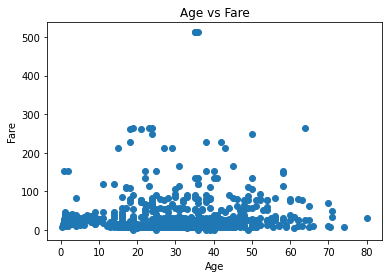

In [ ]:
# transform columns to lists
plt.figure()
plt.title('Age vs Fare')
plt.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

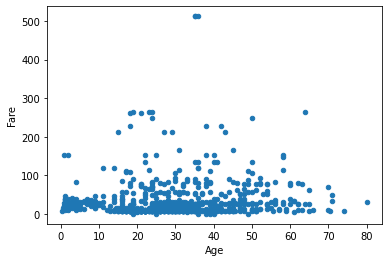

In [ ]:
df.plot.scatter(x = 'Age', y= 'Fare')

Text(0, 0.5, 'Percentage')

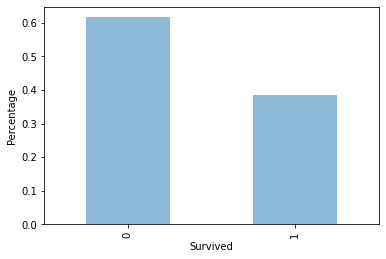

In [ ]:
df.Survived.value_counts(normalize = 'True').plot(kind="bar",alpha=0.5)
plt.xlabel('Survived')
plt.ylabel('Percentage')

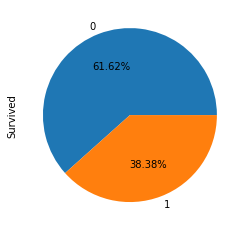

In [ ]:
# wrapper for matplotlib.pyplot.pie
df.Survived.value_counts(normalize = 'True').plot.pie(legend=False,autopct='%.2f%%')

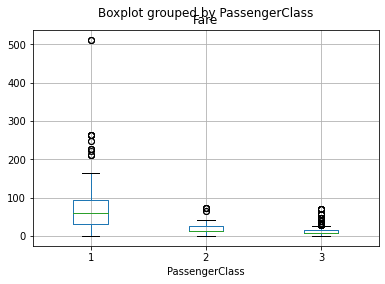

In [ ]:
df.boxplot(column = 'Fare', by = 'PassengerClass')